## Regresión lineal múltiple
### PUCE - Inteligencia Artificial   -   Jorge Aguilar J.

Existen varios problemas que pueden ajustarse a modelos lineales. Datos sobre Ecuador se puede encontrar en la sección de  <a href="https://pandas.pydata.org/"> datos abiertos del  INEC </a>

Para el presente ejemplo usaremos datos del precio de las casas, pero de la ciudad de Seattle, uno de los factores que afectan los precios es la ubicación, que en esta data está codificado en el zipcode. El gráfico muestra los lugares, el tamaño del círculo es proporcional al precio medio en la zona.
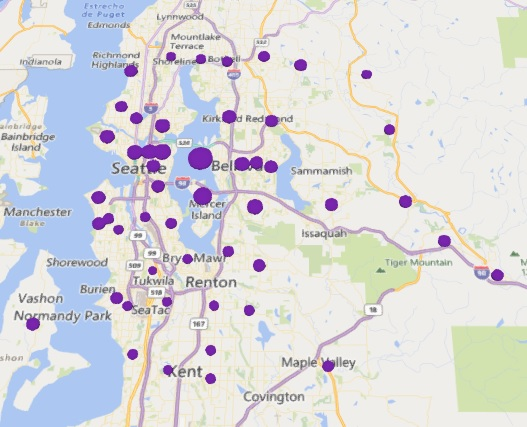


La base consta de 21613 registros con 11 campos. El objetivo es predecir el precio de una casa en función de variables como su tamaño, número de cuartos, baños entre otros. En primer lugar usaremos el modelo de regresión univariable precio = theta(0) + theta(1)*área_de_construcción, con la finalidad de revisar el uso del algoritmo y visualizar los resultados. También probaremos el modelo multivariable, el uso del algoritmo es exactamente igual, solo que la entrada es una matriz con matriz todos los predictores.

## 1.  Familiarizarse con los datos  

In [3]:
'''
1.Ya estamos familiarizados con la librería Pandas, y con la clase DataFrame, para esta clase usaremos también 
  las librerías de numpy y matplotlib:
2.En segundo lugar, importamos las librerías de scikit-learn, el modelo lineal y la división de la data para entrenamiento 
  y prueba
3.En tercer lugar, importamos las librerías para cálculo de errores o métricas del modelo.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# librerías de scikit-learn
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# importamos librerías para calcular las métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,median_absolute_error
from sklearn.model_selection import cross_val_score

# Cargamos los datos en la variable pc y  presentamos lor primeros:

pc = pd.read_csv('home_data.csv')
pc.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,20141013T000000,221900,3,1.00,1180,5650,1.0,3,7,1955,98178
1,20141209T000000,538000,3,2.25,2570,7242,2.0,3,7,1951,98125
2,20150225T000000,180000,2,1.00,770,10000,1.0,3,6,1933,98028
3,20141209T000000,604000,4,3.00,1960,5000,1.0,5,7,1965,98136
4,20150218T000000,510000,3,2.00,1680,8080,1.0,3,8,1987,98074


In [4]:
print('Tamaño del arreglo de datos: registros y campos: ', pc.shape)

Tamaño del arreglo de datos: registros y campos:  (21613, 11)


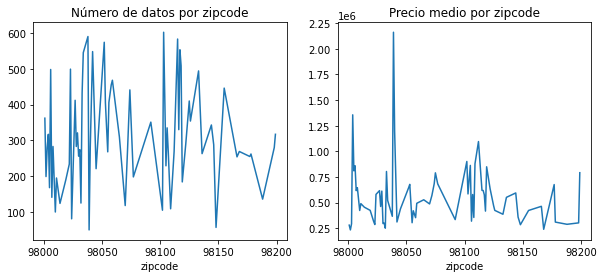

In [5]:
# Los datos completos son muy dispersos porque los precios de las casas, como se aprecian en la imagen inicial, 
# dependen de la ubicación. Considerando esto, lo primero que haremos es agruparlos por cada zona o zip code.
# En primer lugar hagamos un par de gráficos: número de datos en cada zona (zipcode) y su precio medio 

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
pc.groupby("zipcode").size().plot(ax=ax1,title='Número de datos por zipcode');
#pcm['price'].plot(ax=ax2,title='Precio medio por zipcode');
pc.groupby("zipcode")['price'].mean().plot(ax=ax2,title='Precio medio por zipcode');


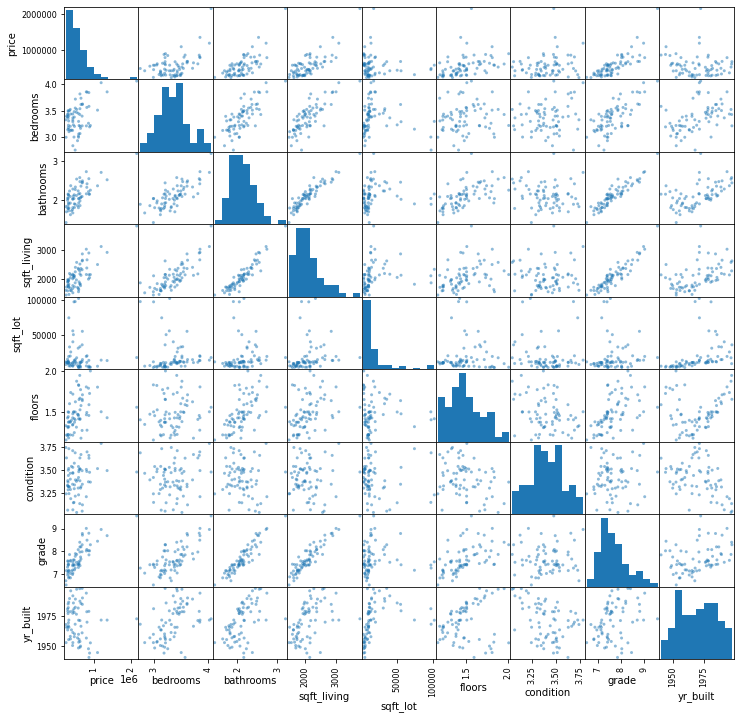

In [6]:
# Los agrupamos por el valor medio en cada zona 
# Una mirada de los datos por pares de variables

pcm=pc.groupby(['zipcode']).mean()
pd.plotting.scatter_matrix(pcm,figsize=(12,12));

In [7]:
# Y veamos la correlación entre variables. Observe y compare el gráfico anterior y los valores de correlación  
pcm.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
price,1.000000,0.511603,0.719673,0.765753,-0.077479,0.376205,0.197907,0.807801,-0.113677
bedrooms,0.511603,1.000000,0.756965,0.797811,-0.124227,0.101602,0.157038,0.717066,0.442768
bathrooms,0.719673,0.756965,1.000000,0.933929,0.100444,0.582599,-0.100274,0.929465,0.535084
sqft_living,0.765753,0.797811,0.933929,1.000000,0.186817,0.359839,0.000424,0.928647,0.460939
sqft_lot,-0.077479,-0.124227,0.100444,0.186817,1.000000,-0.011778,-0.112053,0.028247,0.364570
floors,0.376205,0.101602,0.582599,0.359839,-0.011778,1.000000,-0.300813,0.534303,0.214591
condition,0.197907,0.157038,-0.100274,0.000424,-0.112053,-0.300813,1.000000,0.022045,-0.402826
grade,0.807801,0.717066,0.929465,0.928647,0.028247,0.534303,0.022045,1.000000,0.332143
yr_built,-0.113677,0.442768,0.535084,0.460939,0.364570,0.214591,-0.402826,0.332143,1.000000


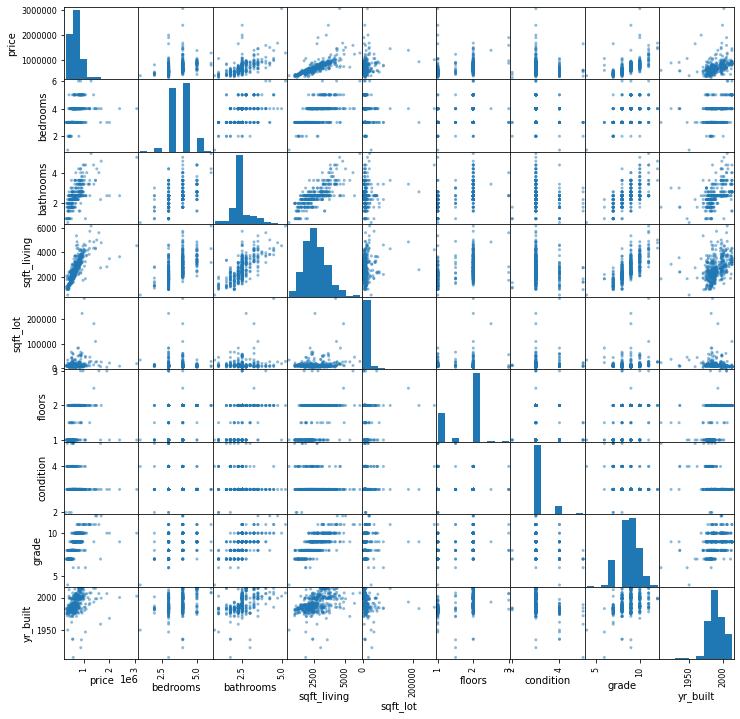

In [9]:
#  Nos podemos preguntar si tiene algún sentido realizar un análisi más detallados sobre esto datos, por ahora los dejamos así
# y tomamos una de las zonas, cualquiera de ellas, sin conocerla tomaremos la zona 98074 y realizamos un gráfico

pc98074 = pc[(pc["zipcode"] == 98074)]  
  
pc98074=pc98074.drop('zipcode',axis=1);
pd.plotting.scatter_matrix(pc98074,figsize=(12,12));



In [10]:
# Observamos las correlaciones y aunque los datos varían, se conservan las mismas relaciones vistas con 
# los valores medios
pc98074.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
price,1.000000,0.355984,0.592828,0.720072,0.184586,0.305448,-0.088585,0.604182,0.344910
bedrooms,0.355984,1.000000,0.457143,0.589046,-0.023391,0.338710,-0.122587,0.403341,0.348175
bathrooms,0.592828,0.457143,1.000000,0.723111,0.128501,0.444350,-0.146930,0.568995,0.461519
sqft_living,0.720072,0.589046,0.723111,1.000000,0.174991,0.448865,-0.132912,0.746971,0.423889
sqft_lot,0.184586,-0.023391,0.128501,0.174991,1.000000,0.018814,0.115192,0.117099,-0.114341
floors,0.305448,0.338710,0.444350,0.448865,0.018814,1.000000,-0.193176,0.447162,0.438805
condition,-0.088585,-0.122587,-0.146930,-0.132912,0.115192,-0.193176,1.000000,-0.272814,-0.368274
grade,0.604182,0.403341,0.568995,0.746971,0.117099,0.447162,-0.272814,1.000000,0.374642
yr_built,0.344910,0.348175,0.461519,0.423889,-0.114341,0.438805,-0.368274,0.374642,1.000000


###  Reresión lineal y métricas

## 2. Preparar datos  de entrenamiento y prueba 

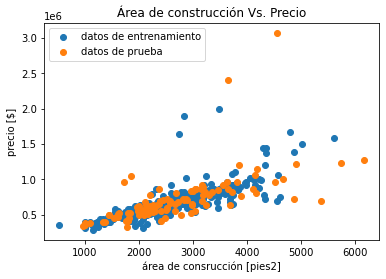

In [11]:
# En primer lugar, selecionamos el área de construcción y el precio en las variables, por familiaridad las colocamos 
# en las variable x1 (1 variable (el área)) y precio en y  
# separamos los datos en entrenamiento y prueba con el 75% y 25%, respectivamente (valorers por defecto del algoritmo)
# graficamos los datos de entrenamiento y prueba:

x1= pc98074.iloc[:,[4]];
y= pc98074.iloc[:,[1]];
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=0)

plt.figure()
plt.scatter(x1_train,y_train, label='datos de entrenamiento')
plt.scatter(x1_test, y_test, label='datos de prueba')
plt.title('Área de construcción Vs. Precio')
plt.xlabel('área de consrucción [pies2]')
plt.ylabel('precio [$]')
plt.legend(loc=2);


## 3. Escoger el algoritmo:  Modelo lineal 
## 4. Ajustar el modelo (funcion fit)
Ajustamos al modelo lineal 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


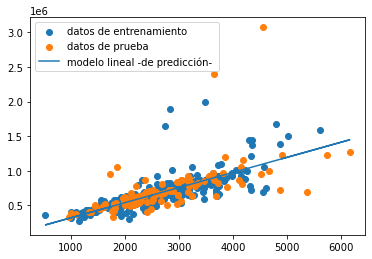

In [39]:
lmd   = linear_model.LinearRegression();
lmd.fit(x1_train,y_train);

aux =  lmd.predict(x1)
arr = x1.to_numpy()

print(type(aux))
print(type(arr))

plt.figure()
plt.scatter(x1_train, y_train, label='datos de entrenamiento')
plt.scatter(x1_test, y_test, label='datos de prueba')
plt.plot(arr,aux,label='modelo lineal -de predicción- ');
plt.legend(loc=2);

In [10]:
print("theta0 = %9.2f" % lmd.intercept_)
print('theta1 = %9.2f' % lmd.coef_)

theta0 = 101800.11
theta1 =    218.59


## 5.  Uso de métricas 

In [11]:
# calculamos algunos métricas para el modelo y así poder comparar con los otros modelos

mse_ml = mean_squared_error(y, yPredl)
mae_ml = mean_absolute_error(y, yPredl)
mdae_ml = median_absolute_error(y, yPredl)
r2_ml   = r2_score(y, yPredl)  

print('Error medio cuadrático         : %16.2f' %mse_ml)
print('Error medio absoluto           : %16.2f' %mae_ml)
print('Error mediano absoluto         : %16.2f' %mdae_ml)
print('coeficiente de determinación R2: %16.2f' %r2_ml)

Error medio cuadrático         :   34573368839.33
Error medio absoluto           :         87084.56
Error mediano absoluto         :         44353.88
coeficiente de determinación R2:             0.52


### Métricas para los datos de entreanmiento 

In [12]:
yPredt = lmd.predict(x1_train)
mse_mlt = mean_squared_error(y_train, yPredt)
mae_mlt = mean_absolute_error(y_train, yPredt)
mdae_mlt = median_absolute_error(y_train, yPredt)
r2_mlt   = r2_score(y_train, yPredt)  

print('Error medio cuadrático         : %16.2f' %mse_mlt)
print('Error medio absoluto           : %16.2f' %mae_mlt)
print('Error mediano absoluto         : %16.2f' %mdae_mlt)
print('coeficiente de determinación R2: %16.2f' %r2_mlt)

Error medio cuadrático         :   21327002383.46
Error medio absoluto           :         76557.96
Error mediano absoluto         :         42729.53
coeficiente de determinación R2:             0.62


### Métricas para los datos de prueba 

In [13]:
yPredp = lmd.predict(x1_test)
mse_mlp = mean_squared_error(y_test, yPredp)
mae_mlp = mean_absolute_error(y_test, yPredp)
mdae_mlp = median_absolute_error(y_test, yPredp)
r2_mlp   = r2_score(y_test, yPredp)  

print('Error medio cuadrático         : %16.2f' %mse_mlp)
print('Error medio absoluto           : %16.2f' %mae_mlp)
print('Error mediano absoluto         : %16.2f' %mdae_mlp)
print('coeficiente de determinación R2: %16.2f' %r2_mlp)

Error medio cuadrático         :   73954458302.72
Error medio absoluto           :        118379.85
Error mediano absoluto         :         62650.30
coeficiente de determinación R2:             0.37


## 6. Actualizar el modelo, incorporando más variables:  Regresión lineal multivariable

In [14]:
X= pc98074.iloc[:,[2,3,4,5,6,7,8,9]];
# recuerden que los datos de y, son los mismos y ya los tenemos. 
# y= pc98074.iloc[:,[1]];
# Separamos los datos en entrenamiento y prueba, los datos se selecionan de manera aleatoria, entonces en este caso, y_train y 
# y_test serán arreglos del mismo tamaño pero con datos diferentes


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lmdm = linear_model.LinearRegression();
lmdm.fit(X_train,y_train);
yPredm = lmdm.predict(X_train)

mse_mlm = mean_squared_error(y_train, yPredm)
mae_mlm = mean_absolute_error(y_train, yPredm)
mdae_mlm = median_absolute_error(y_train, yPredm)
r2_mlm   = r2_score(y_train, yPredm)  

print('Error medio cuadrático         : %16.2f' %mse_mlm)
print('Error medio absoluto           : %16.2f' %mae_mlm)
print('Error mediano absoluto         : %16.2f' %mdae_mlm)
print('coeficiente de determinación R2: %16.2f' %r2_mlm)


Error medio cuadrático         :   19288380295.24
Error medio absoluto           :         72626.04
Error mediano absoluto         :         39070.02
coeficiente de determinación R2:             0.65


## 7. El modelo está definido por el conjunto de parámetros en este caso: h(Θ)= yPredict =  Θ'*X, este modelo sirve para realizar predicciones: función  predict 

In [15]:
# PARAMETROS DEL MODELO
ecasa=np.array([2500,3000,3500])
print('theta0 = ', lmdm.intercept_)
print("theta1 a theta8 =",  lmdm.coef_)

# para el modelo univariable precio=theta0+theta1*superficie_construcción
print('el precio de una casa de 3000 pies2 = $%8.0f  USD' %lmd.predict(np.array([3000]).reshape(1,-1)))

# para el modelo multivariable:  
# bedrooms	bathrooms	sqft_living	sqft_lot	floors	condition	grade	yr_built
c2=[4, 2, 3000, 6000, 2, 3, 7, 2010];
pc2=lmdm.predict(np.array(c2).reshape(1,-1))

print('el precio de una casa de 4 cuartos, 2 baños, 3000 pies2, 6000 pies de terreno, 2 pisos, condicion 3, grado 7 y del 2010 es = $%8.0f  USD' % pc2)

theta0 =  [-2627172.03982092]
theta1 a theta8 = [[-3.72640826e+04  2.55727828e+04  1.70789838e+02  4.77895979e-01
  -3.23805584e+03  4.60039360e+04  4.52826726e+04  1.19934410e+03]]
el precio de una casa de 3000 pies2 = $  757574  USD
el precio de una casa de 4 cuartos, 2 baños, 3000 pies2, 6000 pies de terreno, 2 pisos, condicion 3, grado 7 y del 2010 es = $  649350  USD


## 8. Ejercicios para completar

Con los datos del ejercicio, complete las siguientes preguntas:

Ejercicio 1: Calcule los errores para los datos de prueba (5%)

Ejercicio 2: Una forma sencilla de revisar los resultados es graficando los datos reales en contra de los predichos: y Vs. yPredm Realice esta tarea, grafique también el resultado (línea) y muestre los parámetros theta. la pendiente normalmente debe tender a 1, para esta zona, los datos atípicos bajan el ajuste del modelo a 0.65 (20%)

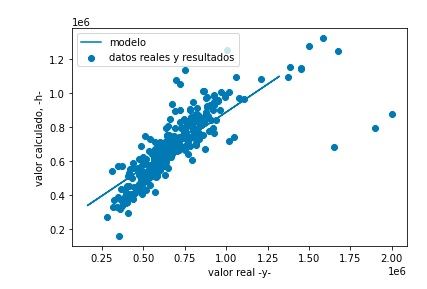


Ejercicio 3.

Parta del modelo de una variable ya resuelto (observe que el área de vivienda es la que tiene mayor correlación), pruebe diferentes modelos añadiendo cada vez una nueva variable, hágalo considerando el orden de correlación de las variables con el precio y de mayor a menor, ¿que variables dejaría fuera y por qué? * 35%

Ejercicio 4.

calcule las métricas de cada modelo *20%

Ejercicio 5.

Realice un gráfico que muestre el número de variables usadas y R2 * 20%


## 9. PARA PRACTICAR:

Los datos sirven para encontrar patrones que nos permitan dar respuesta a las diferentes problemáticas que se plantea en la actividad humana.

Ahora tienen el conocimiento como para responder con la data a preguntas como las siguientes.  Con los datos de esperanza de vida ya revisados.

1.  ¿Cuál de estos varios factores de predicción que se han elegido afectan realmente la esperanza de vida?
2. ¿Debería un país con un valor de esperanza de vida más bajo (<65) aumentar su gasto en atención médica para mejorar su esperanza de vida promedio?
3.  ¿Cómo afectan las tasas de mortalidad infantil y adulta a la esperanza de vida?
4.   ¿La esperanza de vida tiene una correlación positiva o negativa con los hábitos alimenticios, el estilo de vida, el ejercicio, el tabaquismo, el consumo de alcohol, etc.?
5.   ¿Cuál es el impacto de la escolarización en la esperanza de vida de los seres humanos?
6.   ¿La esperanza de vida tiene relación positiva o negativa con el consumo de alcohol?
7.   ¿Los países densamente poblados tienden a tener una esperanza de vida más baja?
8.   ¿Cuál es el impacto de la cobertura de inmunización en la esperanza de vida